One-Class Support Vector Machine | Example 1

In [2]:
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [3]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# input data
df = data[["sepal_length", "sepal_width"]]

In [4]:
# model specification
# nu = 0.03 means that the algorithm will designate 3% data as outliers.
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df)

In [5]:
# prediction
y_pred = model.predict(df)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
13,4.3,3.0
41,4.5,2.3
117,7.7,3.8
118,7.7,2.6
131,7.9,3.8


Text(0.5, 1.0, 'Visualizing Anomalies')

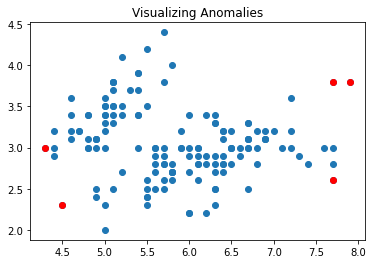

In [7]:
# visualize outputs
plt.scatter(data["sepal_length"], df["sepal_width"])
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], c = "r")
plt.title("Visualizing Anomalies")

One-Class Support Vector Machine | Example 2

In [8]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.svm import OneClassSVM
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate F1 score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)
# Classification report
target_names = ['class 0', 'class 1']
print(classification_report(testy, yhat, target_names=target_names))
print('Classification Report: ', classification_report)

F1 Score: 0.123
              precision    recall  f1-score   support

     class 0       0.07      0.80      0.12         5
     class 1       1.00      0.99      0.99      4995

    accuracy                           0.99      5000
   macro avg       0.53      0.89      0.56      5000
weighted avg       1.00      0.99      0.99      5000

Classification Report:  <function classification_report at 0x7f80c528b440>


In [ ]:
# Provide the confusion matrix
cm = confusion_matrix(testy, yhat)
cm[::-1, ::-1]

array([[4939,   56],
       [   1,    4]])

Local Outlier Factor Method. A simple approach to identifying outliers is to locate those examples that are far from the other examples in the feature space.

This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.

The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.

In [ ]:
# local outlier factor for imbalanced classification
from numpy import vstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor

# make a prediction with a lof model
def lof_predict(model, trainX, testX):
	# create one large dataset
	composite = vstack((trainX, testX))
	# make prediction on composite dataset
	yhat = model.fit_predict(composite)
	# return just the predictions on the test set
	return yhat[len(trainX):]

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = LocalOutlierFactor(contamination=0.01)
# get examples for just the majority class
trainX = trainX[trainy==0]
# detect outliers in the test set
yhat = lof_predict(model, trainX, testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)
# Classification report
target_names = ['class 0', 'class 1']
print(classification_report(testy, yhat, target_names=target_names))
print('Classification Report: ', classification_report)

F1 Score: 0.138
              precision    recall  f1-score   support

     class 0       0.08      0.80      0.14         5
     class 1       1.00      0.99      0.99      4995

    accuracy                           0.99      5000
   macro avg       0.54      0.90      0.57      5000
weighted avg       1.00      0.99      0.99      5000

Classification Report:  <function classification_report at 0x7f0976cb48c0>
